# Končno poročilo

## 1. Uvod in predstavitev problema

Za našo projektno nalogo smo si izbrali problematiko kaznivih dejanj v Sloveniji, pri čemer smo uporabili podatke o zabeleženih zločinih od leta 2009 dalje. Menimo, da je koristno ugotoviti razne povezave in podobnosti med storjenimi kaznivimi dejanji, ker bi to lahko veliko doprineslo k področju kriminalistike. Dandanes, ko je kriminal precej razširjen, je namreč dobro odkriti vzorce, ki se ponavljajo med podobnimi zločini in tako morebiti preprečiti v prihodnje, da bi se podobna kazniva dejanja dogajala še naprej.

Naši glavni cilji so zato predvsem iskati zanimive korelacije med zločini, ki so se dogajali, najti podobnosti, ki zares izstopajo ter ugotoviti ključne dejavnike oz. atribute, ki so najpogostejši. Na primer, odkriti, če je kakšna povezava med starostjo storitelja in vrsto zločina, če se določene vrste kaznivih dejanj dogajajajo ob določenih urah, ali kakšna Policijska uprava posebej izstopa z različnimi zločini.

Podatke smo našli na portalu [OPSI](https://podatki.gov.si/dataset/mnzpkazniva-dejanja-od-leta-2009-dalje), kjer so za vsako leto od 2009 dalje posebej objavljeni podatki o storjenih kaznivih dejanjih, za katera je policija vložila kazensko ovadbo ali poročilo. Za vsako leto je od 50 000 do 100 000, kar nam bo pripomoglo k res temeljitemu raziskovanju in rudarjenju.

## 2. Predstavitev podatkov

Struktura podatkovne baze je sledeča:

**ZaporednaStevilkaKD**: zločini so oštevilčeni z zaporedno številko, pri čemer se štetje vsako leto znova začne z 1.<br>
- Tip: int64
- Vrednosti: od 2009000001 do 2019061194.
- Obrazložitev: Ker se zaporedne številke resetirajo vsako leto, jih spremenimo tako, da se začnejo z letom, ko je bil podatek zapisan v tabelo (npr. ID 61193 iz leta 2019 postane 2019061193). Ni neznanoh vrednosti.

**MesecStoritve**: datum v formatu MM.LLLL
- Tip: string. 
- Primer vrednosti: 03.2002
- Ni neznanih vrednosti

**UraStoritve**: podana v intervalu
- Tip: int64 
- Vrednosti: 0 - 23
- Ni neznanih vrednosti

**DanVTednu**
- int64 
- Vrednosti: 0 - 7
- Ni neznanih vrednosti

**PUStoritveKD**: policijska uprava, ki je vložila kazensko ovadbo oz. zapisala zapisnik za storjen zločin
- Tip: string 
- Primer vrednosti: "PU LJUBLJANA"

**Povratnik**: atribut o tem, ali je osumnljenec policiji znan ali ne (DA ali NE)
- Tip: bool
- Ni neznanih vrednosti

**OpisKD**: zakon/člen/odstavek/točko/alinejo akta, ki je bil kršen in naziv
- Tip: string
- Primer vrednosti: "KZ12/204*/2/S/ - TATVINA"
- Ni neznanih vrednosti

**PoglavjeKD**: poglavje zakonika, ki obravnava določeno kaznivo dejanje
- Tip: object
- Primer vrednosti: "KD ZOPER GOSPODARSTVO"
- Zelo malo neznanih vrednosti
- Neznane vrednosti nastavimo na "unknown"

**GospodarskiKriminal**: kaznivo dejanje označeno kot 'SPLOSNA' ali 'GOSPODARSKA'
- Tip: bool
- Ni neznanih vrednosti
- Obrazložitev: če gre za gospodarski kriminal, je vrednost atributa True

**OrganiziraniKriminal**:
- Tip: bool
- Ni neznanih vrednosti
- Obrazložitev: če gre za organizirani kriminal, je vrednost atributa True

**MladoletnikaKriminaliteta**:
- Tip: bool
- Ni neznanih vrednosti
- Obrazložitev: če gre za mladoletniško kriminaliteto, je vrednost atributa True

**Poskus**: dokončanost kaznivega dejanja (DA ali NE)
- Tip: bool
- Ni neznanih vrednosti

**KriminalistinaOznacba1**: oznaka kaznivega dejanja, npr. Z VLOMOM
- Tip: object
- Primer vrednosti: "DAVKA NA DODANO VREDNOST - O"
- Neznane vrednosti nastavimo na "unknown"

**KriminalisticnaOznacba2**

**KriminalisticnaOznacba3**

**UporabljenoSredstvo1**: sredstvo, ki se je uporabilo pri storitvi kaznivega dejanja (številka sredstva - sredstvo)
- Tip: Object
- Primer vrednosti: "152-LISTINE"
- Neznane vrednosti nastavimo na "unknown" 

**UporabljenoSredstvo2**

**UporabljenoSredstvo3**

**UporabljenoSredstvo4**

**UpravnaEnotaStoritve**: Upravna enota, ki je obravnavala kaznivo dejanje
- Tip: Object
- Primer vrednosti: "CELJE"
- Ni neznanih vrednosti

**OpisKraja**: podroben opis prizorišča kaznivega dejanja
- Tip: Object

**LetoZakljucnegaDokumenta**: leto, ko se je primer obravnave kaznivega dejanja zaprl oz. končal
- Tip: int64
- Vrednosti: 2009 - 2019
- Ni neznanih vrednosti

**VrstaZakljucnegaDokumenta**: OVADBA ali POROČILO
- Tip: Object

**ZaporednaStevilkaOsebeVKD**: številka za štetje in ločevanje oseb, ki so bile udeležene v kaznivem dejanju
- Tip: float64

**VrstaOsebe**: vloga osebe v kaznivem dejanju (ŽRTEV, OVADENI OSUMLJENEC ali OSTALO)
- Tip: object

**StarostniRazred**: interval (razred) starosti, ki mu oseba pripada ob storitvi kaznivega dejanja
- Tip: object

**Spol**: ŽENSKI, MOŠKI ali PRAVNA OSEBA
- Tip: object

**Drzavljanstvo**: SLOVENSKO ali TUJE
- Tip: object

**Poskodba**: če ni prisotna, zapis BREZ POŠKODBE, sicer ni zapisa
- Tip: object

**VplivAlkohola**: ali je bila oseba pod vplivom alkohola (NN ali NE)
- Tip: object

**VplivMamil**: ali je bila oseba pod vplivom mamil (NN ali NE)
- Tip: object

**OrganiziranaZdruzba**: ali je oseba pripadala organizirani združbi (NE ali ni zapisa)
- Tip: object

**Skoda**: interval materializirane škode v evrih oz. BREZ, če ni bilo škode
- Tip: object

## 3. Analiza podatkov

### Ali je število zločinov odvisno od dneva v tednu?
Najprej nas je zanimalo, če izmed vseh dni v tednu izstopa dan, ko se zgodi odločno največ kriminala. Prišli smo do ugotovitve, da se največ kriminala zgodi ob petkih. Na ta dan se je namreč zabeležilo 250.866 zločinov skozi vsa dokumentirana leta. Najmanjša številka pa je zabeležena ob nedeljah in sicer 159.454.

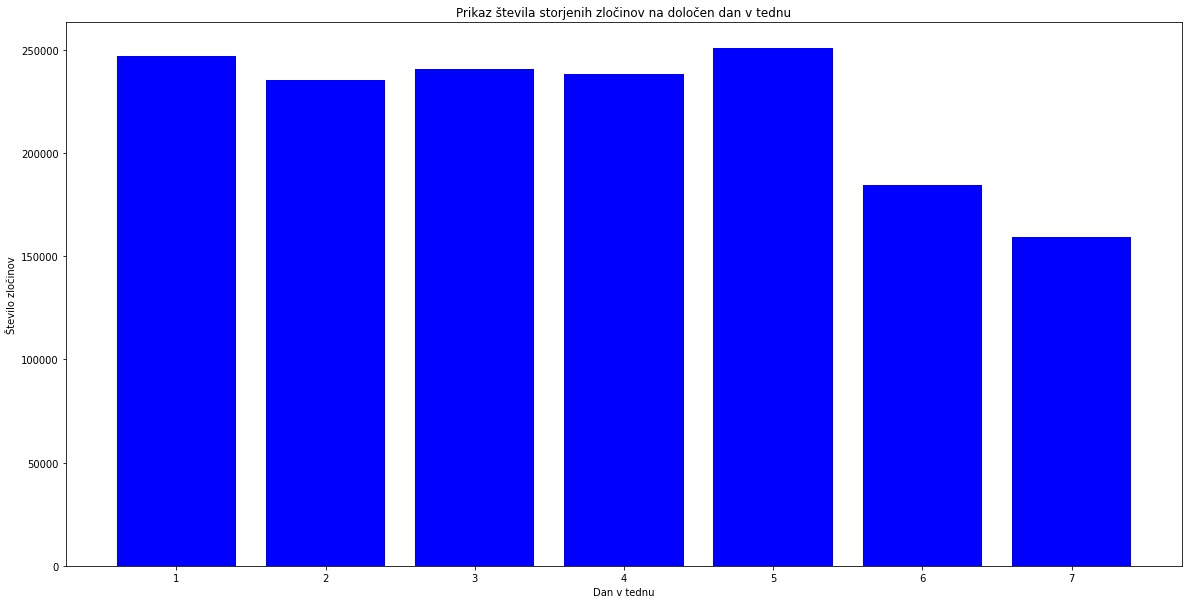

In [3]:
from IPython.display import Image
Image(filename='../PR21NCMSTK/img/zlociniTeden.jpg')

### Kaj pa od ure?

Nato nas je zanimala tudi ura, ob kateri se zgodi največ kriminala. Predvidevali smo, da bodo najbolj izstopale večerne oz. nočne ure. Naše domneve so bile pravilne, saj se je po naših izračunih največ zločinov zabeležilo ob polnoči, najmanj pa ob četrti uri zjutraj.

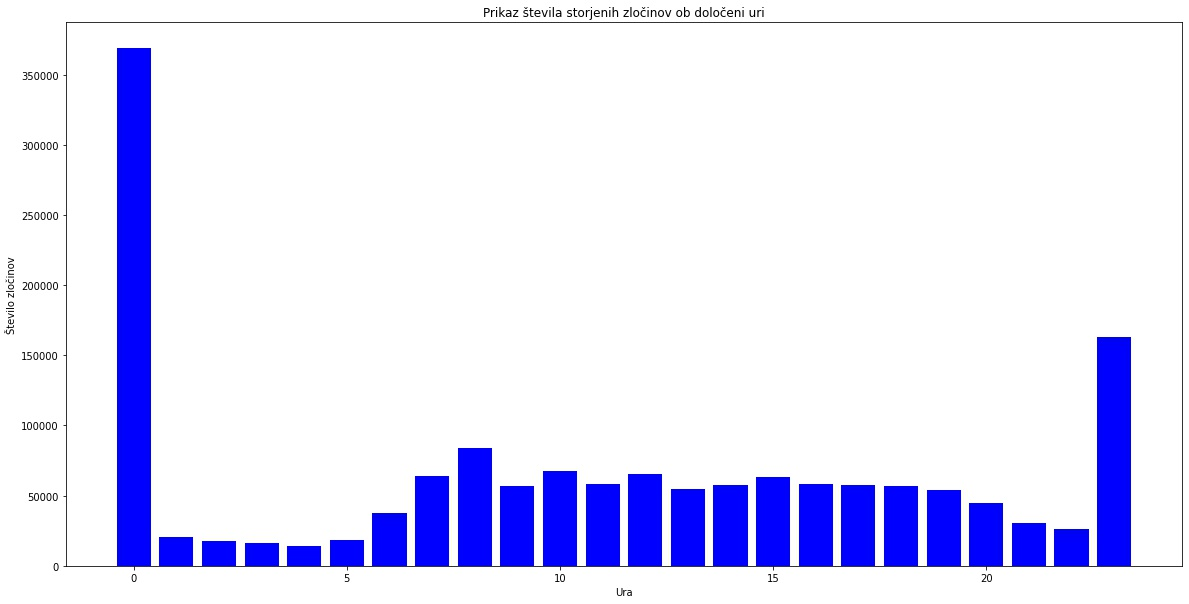

In [4]:
Image(filename='../PR21NCMSTK/img/zlociniUra.jpg')

### Najpogostejši storjeni zločini

Ugotovili smo, da po pogostosti pojavljanja skozi vsa dokumentirana leta odločno izstopa *tatvina*, na drugem mestu je *poslovna goljufija*, takoj za njo pa *kršitev temeljnih pravic delavcev*. Najredkeje zabeležena vrsta zločina je *zloraba položaja ali zaupanja pri gospodarski dejavnosti*.

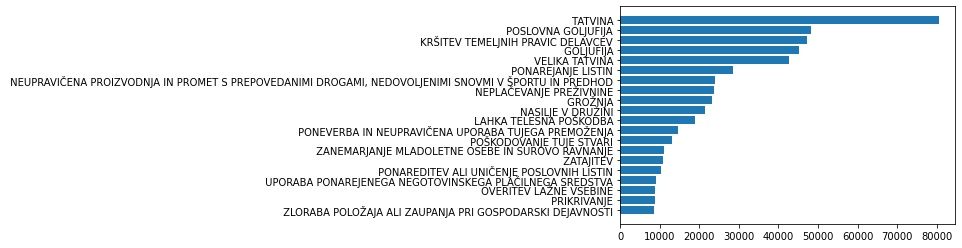

In [5]:
Image(filename='../PR21NCMSTK/img/zlociniVrsta.jpg')

### Kriminal v Sloveniji skozi leta

Zanimalo nas je tudi, kako je pogostost kriminala naraščala skozi leta ter v katerem letu smo zabeležili največ kriminala. Iz spodnjega grafa je razvidna velika rast kriminala v Sloveniji v zadnjih 15 letih, pri čemer smo dosegli vrh leta 2009 z 176.685 zabeleženimi zločini.

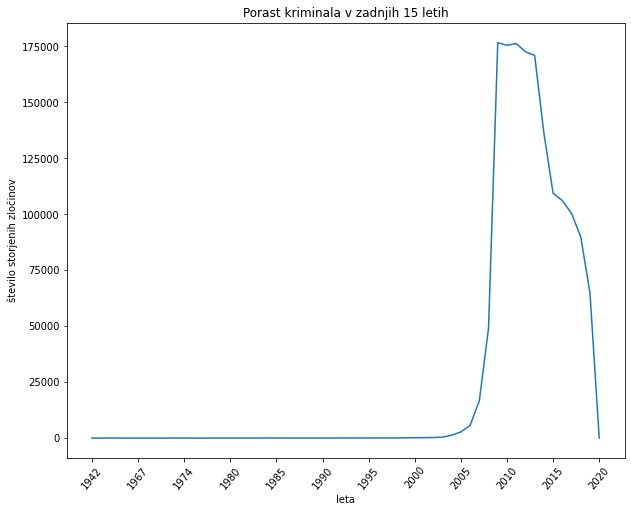

In [6]:
Image(filename='../PR21NCMSTK/img/zlociniLeta.jpg')

## 4. Glavne ugotovitve

### Osamelci

### Korelacije

### Napovedni model